# <center> <img src="../../img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> Computer Systems Engineering  </center>
---
### <center> Big Data Processing </center>
---
#### <center> **Autumn 2025** </center>
---

**Lab 04**: Data Unions & Joins Pipeline

**Date**: September 23rd 2025

**Student Name**: Vicente Sebastian Serrano Cabrera

**Professor**: Pablo Camarillo Ramirez

## Create Session

In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Examples on SparkSQL") \
    .master("spark://22410cdc64b0:7077") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/27 20:45:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Datasets

In [2]:
from pcamarillor.spark_utils import SparkUtils
from pyspark.sql.functions import col, get_json_object

base_path = "/opt/spark/work-dir/data/car_service/"

agencies_schema = SparkUtils.generate_schema([("agency_id", "string"), ("agency_info", "string")])
brands_schema   = SparkUtils.generate_schema([("brand_id", "string"), ("brand_info", "string")])
cars_schema     = SparkUtils.generate_schema([("car_id", "int"),    ("car_info", "string")])
customers_schema= SparkUtils.generate_schema([("customer_id", "int"),("customer_info", "string")])
rentals_schema  = SparkUtils.generate_schema([("rental_id", "int"), ("rental_info", "string")])

agencies_df  = spark.read.schema(agencies_schema ).option("header", "true").csv(base_path + "agencies")
brands_df    = spark.read.schema(brands_schema   ).option("header", "true").csv(base_path + "brands")
cars_df      = spark.read.schema(cars_schema     ).option("header", "true").csv(base_path + "cars")
customers_df = spark.read.schema(customers_schema).option("header", "true").csv(base_path + "customers")
rentals_df   = spark.read.schema(rentals_schema  ).option("header", "true").csv(base_path + "rentals")


**Agencies**

In [3]:
agencies_df.show(truncate=False)

[Stage 0:>                                                          (0 + 1) / 1]

+---------+-----------------------------------------------------+
|agency_id|agency_info                                          |
+---------+-----------------------------------------------------+
|1        |{'agency_name': 'NYC Rentals', 'city': 'New York'}   |
|2        |{'agency_name': 'LA Car Rental', 'city': 'Londres'}  |
|3        |{'agency_name': 'Zapopan Auto', 'city': 'Zapopan'}   |
|4        |{'agency_name': 'SF Cars', 'city': 'San Francisco'}  |
|5        |{'agency_name': 'Mexico Cars', 'city': 'Mexico City'}|
+---------+-----------------------------------------------------+



**Brands**

In [4]:
brands_df.show(truncate=False)

+--------+-----------------------------------------------------+
|brand_id|brand_info                                           |
+--------+-----------------------------------------------------+
|1       |{'brand_name': 'Mercedes-Benz', 'country': 'Germany'}|
|2       |{'brand_name': 'BMW', 'country': 'Germany'}          |
|3       |{'brand_name': 'Audi', 'country': 'Germany'}         |
|4       |{'brand_name': 'Ford', 'country': 'US'}              |
|5       |{'brand_name': 'BYD', 'country': 'China'}            |
|6       |{'brand_name': 'Honda', 'country': 'Japan'}          |
|7       |{'brand_name': 'Toyota', 'country': 'Japan'}         |
+--------+-----------------------------------------------------+



**Cars**

In [5]:
cars_df.show(truncate=False)

+------+----------------------------------------------------------------------------------------+
|car_id|car_info                                                                                |
+------+----------------------------------------------------------------------------------------+
|1     |{'car_name': 'Chang-Fisher Model 7', 'brand_id': 5, 'price_per_day': 139}               |
|2     |{'car_name': 'Sheppard-Tucker Model 4', 'brand_id': 6, 'price_per_day': 70}             |
|3     |{'car_name': 'Faulkner-Howard Model 5', 'brand_id': 3, 'price_per_day': 53}             |
|4     |{'car_name': 'Wagner LLC Model 1', 'brand_id': 5, 'price_per_day': 89}                  |
|5     |{'car_name': 'Campos PLC Model 4', 'brand_id': 4, 'price_per_day': 112}                 |
|6     |{'car_name': 'Archer-Patel Model 2', 'brand_id': 3, 'price_per_day': 55}                |
|7     |{'car_name': 'Patrick, Barrera and Collins Model 6', 'brand_id': 6, 'price_per_day': 66}|
|8     |{'car_name':

**Customers**

In [6]:
customers_df.show(truncate=False)

+-----------+-------------------------------------------------------------------------+
|customer_id|customer_info                                                            |
+-----------+-------------------------------------------------------------------------+
|1          |{'customer_name': 'Tiffany Riley', 'city': 'Monterrey', 'age': 32}       |
|2          |{'customer_name': 'Matthew Davies', 'city': 'Monterrey', 'age': 36}      |
|3          |{'customer_name': 'Rebecca Miller', 'city': 'Mexico City', 'age': 30}    |
|4          |{'customer_name': 'Katelyn Mccoy', 'city': 'New York', 'age': 34}        |
|5          |{'customer_name': 'Dana Dennis', 'city': 'Zapopan', 'age': 26}           |
|6          |{'customer_name': 'Daniel Norton', 'city': 'Mexico City', 'age': 34}     |
|7          |{'customer_name': 'Robert Garcia', 'city': 'Zapopan', 'age': 47}         |
|8          |{'customer_name': 'Michael Williams', 'city': 'Monterrey', 'age': 33}    |
|9          |{'customer_name': '

**Rentals**

In [7]:
rentals_df.show(truncate=False)

+---------+--------------------------------------------------+
|rental_id|rental_info                                       |
+---------+--------------------------------------------------+
|11891    |{'car_id': 21, 'customer_id': 71, 'agency_id': 1} |
|11892    |{'car_id': 11, 'customer_id': 52, 'agency_id': 2} |
|11893    |{'car_id': 22, 'customer_id': 116, 'agency_id': 4}|
|11894    |{'car_id': 5, 'customer_id': 107, 'agency_id': 1} |
|11895    |{'car_id': 4, 'customer_id': 53, 'agency_id': 4}  |
|11896    |{'car_id': 8, 'customer_id': 131, 'agency_id': 2} |
|11897    |{'car_id': 23, 'customer_id': 66, 'agency_id': 3} |
|11898    |{'car_id': 24, 'customer_id': 60, 'agency_id': 4} |
|11899    |{'car_id': 27, 'customer_id': 92, 'agency_id': 2} |
|11900    |{'car_id': 3, 'customer_id': 40, 'agency_id': 4}  |
|11901    |{'car_id': 3, 'customer_id': 35, 'agency_id': 1}  |
|11902    |{'car_id': 3, 'customer_id': 72, 'agency_id': 1}  |
|11903    |{'car_id': 29, 'customer_id': 58, 'agency_id

## Joins

In [8]:
agencies_df = agencies_df.withColumn(
    "agency_name", get_json_object(col("agency_info"), "$.agency_name")
).drop("agency_info")

cars_df = cars_df.withColumn(
    "car_name", get_json_object(col("car_info"), "$.car_name")
).drop("car_info")

customers_df = customers_df.withColumn(
    "customer_name", get_json_object(col("customer_info"), "$.customer_name")
).drop("customer_info")

rentals_df = rentals_df \
    .withColumn("car_id",      get_json_object(col("rental_info"), "$.car_id").cast("int")) \
    .withColumn("customer_id", get_json_object(col("rental_info"), "$.customer_id").cast("int")) \
    .withColumn("agency_id",   get_json_object(col("rental_info"), "$.agency_id").cast("string")) \
    .drop("rental_info")

In [9]:
df_final = (rentals_df
    .join(cars_df,      on="car_id")
    .join(agencies_df,  on="agency_id")
    .join(customers_df, on="customer_id")
    .select("rental_id", "car_name", "agency_name", "customer_name")
)

df_final.show(truncate=False)

+---------+-----------------------------------+-------------+---------------+
|rental_id|car_name                           |agency_name  |customer_name  |
+---------+-----------------------------------+-------------+---------------+
|11891    |Wallace-Carlson Model 9            |NYC Rentals  |Margaret Jones |
|11892    |Grimes-Green Model 8               |LA Car Rental|Albert Williams|
|11893    |Stewart-Allen Model 5              |SF Cars      |Caleb Fleming  |
|11894    |Campos PLC Model 4                 |NYC Rentals  |Andrew Butler  |
|11895    |Wagner LLC Model 1                 |SF Cars      |Kristin Potts  |
|11896    |Jones, Jefferson and Rivera Model 7|LA Car Rental|Jeremy Parks   |
|11897    |Lopez and Sons Model 9             |Zapopan Auto |Terry Wells    |
|11898    |Salazar Ltd Model 8                |SF Cars      |Marc Williams  |
|11899    |Villanueva PLC Model 7             |LA Car Rental|Danny Williams |
|11900    |Faulkner-Howard Model 5            |SF Cars      |Eri

## Pruebas de Carpetas

In [10]:
!pwd

/opt/spark/work-dir/labs/lab04


In [11]:
!du -sh ../../data/car_service/rentals

1.1M	../../data/car_service/rentals


In [12]:
df_final.write \
            .mode("overwrite") \
            .parquet(base_path + "car_service/output/parquet")

In [13]:
!ls -sh ../../data/car_service/car_service/output/parquet

total 116K
60K part-00000-8533a7e9-5a76-40ff-92e1-10109f767785-c000.snappy.parquet
56K part-00001-8533a7e9-5a76-40ff-92e1-10109f767785-c000.snappy.parquet
  0 _SUCCESS


In [14]:
!du -sh ../../data/car_service/car_service/output/parquet

124K	../../data/car_service/car_service/output/parquet


In [15]:
df_final.write \
            .partitionBy("agency_name") \
            .mode("overwrite") \
            .parquet(base_path + "car_service/output/parquet")

In [16]:
!ls ../../data/car_service/car_service/output/parquet

'agency_name=LA Car Rental'  'agency_name=SF Cars'	  _SUCCESS
'agency_name=NYC Rentals'    'agency_name=Zapopan Auto'


In [17]:
!du -sh ../../data/car_service/car_service/output/parquet

144K	../../data/car_service/car_service/output/parquet


## CSV creados

In [18]:
df_final.write \
            .partitionBy("agency_name") \
            .mode("overwrite") \
            .option("header", True) \
            .csv(base_path + "car_service/output/csv")

In [19]:
!du -sh ../../data/car_service/car_service/output/csv/

856K	../../data/car_service/car_service/output/csv/


## PowerBI

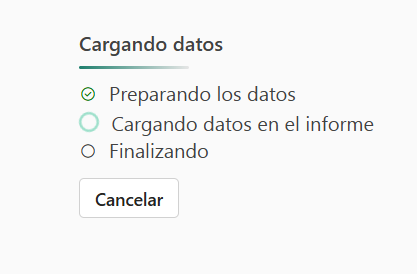

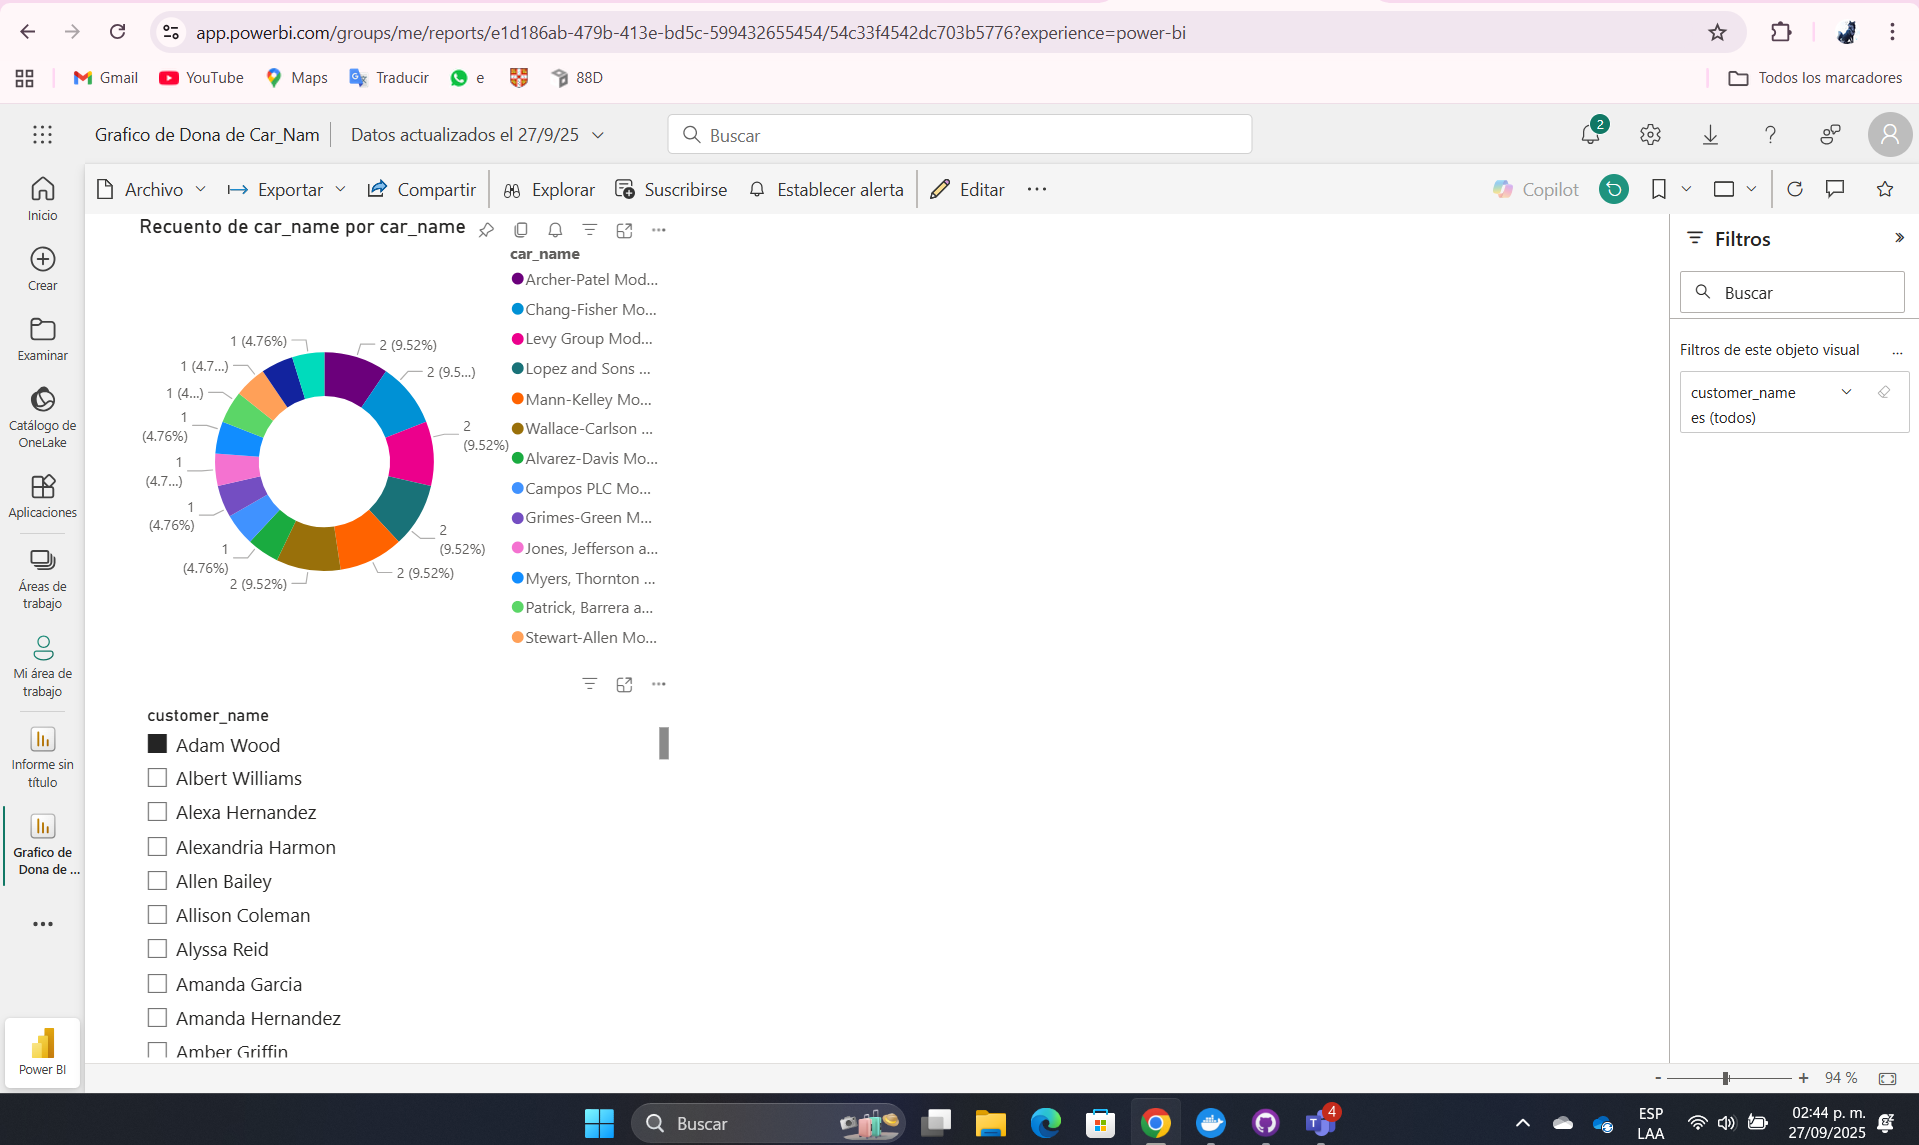